# Notebook 2:  Clustering con GMM y Algoritmos Jerárquicos

En este notebook vamos a implementar el algoritmo de clustering de Mezcla de Normales en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Se incluye además la estrategia para definir el número de grupos k. Al final se propone un ejercicio con nuevos datos, con el fin de aprender a utilizar el algoritmo. 

In [2]:
library(mclust)
library(cluster)
#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("milk1.dat",row.names=1,dec=".",header=TRUE)
summary(datos)

Package 'mclust' version 5.4.1
Type 'citation("mclust")' for citing this R package in publications.


     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

In [3]:
clus <-Mclust(datos, G=4)
summary(clus)

clus

cl <- clus$classification
centers <- t(clus$parameters$mean)
centers
cl


---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VEV (ellipsoidal, equal shape) model with 4 components: 

 log.likelihood  n df       BIC       ICL
      -129.0138 25 71 -486.5678 -486.5782

Clustering table:
1 2 3 4 
5 8 7 5 

'Mclust' model object: (VEV,4) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "bic"           
 [9] "loglik"         "df"             "hypvol"         "parameters"    
[13] "z"              "classification" "uncertainty"   

WATER,PROTEIN,FAT,LACTOSE,ASH
89.45999,1.980001,2.080005,6.200009,0.3279979
71.88271,7.298580,15.881214,3.088610,0.7512686
84.71493,4.756873,4.756149,5.100211,0.8185953
67.86000,10.740002,17.380003,2.379999,1.6400005


HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         1          1          1          1          2          3          3 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         3          2          2          3          3          1          2 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         3          3          2          2          4          4          4 
  REINDEER      WHALE       SEAL    DOLPHIN 
         4          4          2          2

<b>Ejercicio 1: <br>
a) Explique como funciona el método Mclust, describa parámetros de entrada y salida.<br>
b) Interprete y comente los resultados obtenidos. <b>

<b>a) Explique como funciona el método Mclust, describa parámetros de entrada y salida.<b>

mclust es un paquete de R para la agrupación basada en modelos, la clasificación y la estimación de densidad basada en un modelo de mezcla finita normal. Proporciona funciones para la estimación de parámetros a través del algoritmo EM para modelos de mezcla normal con una variedad de estructuras de covarianza y funciones para la simulación de estos modelos.<br> 

Parámetros de entrada:
- Número de grupos(G): Número de grupos de agrupamiento a utilizar.
- Nombre del modelo a utilizar(modelNames): Un vector de cadenas de caracteres que indica los modelos que se ajustarán en la fase EM del agrupamiento.


 <b>b) Interprete y comente los resultados obtenidos.

- Se utilizaron 4 grupos para la agrupación de datos.
- Se ve que las agrupaciones no son muy efectivas, por ejemplo el grupo 2 tiene varios de sus elementos muy separados unos de otros.
- Se observa tambien que algunos de los elementos del grupo 2 y 3 están muy cerca, esto podría indicar un problema de agrupamiento.
- El grupo 4 tiene un elemento muy distante de sus demás elementos, esto podría reflejar un problema de agrupamiento, aunque podría tratarse de un caso excepcional.

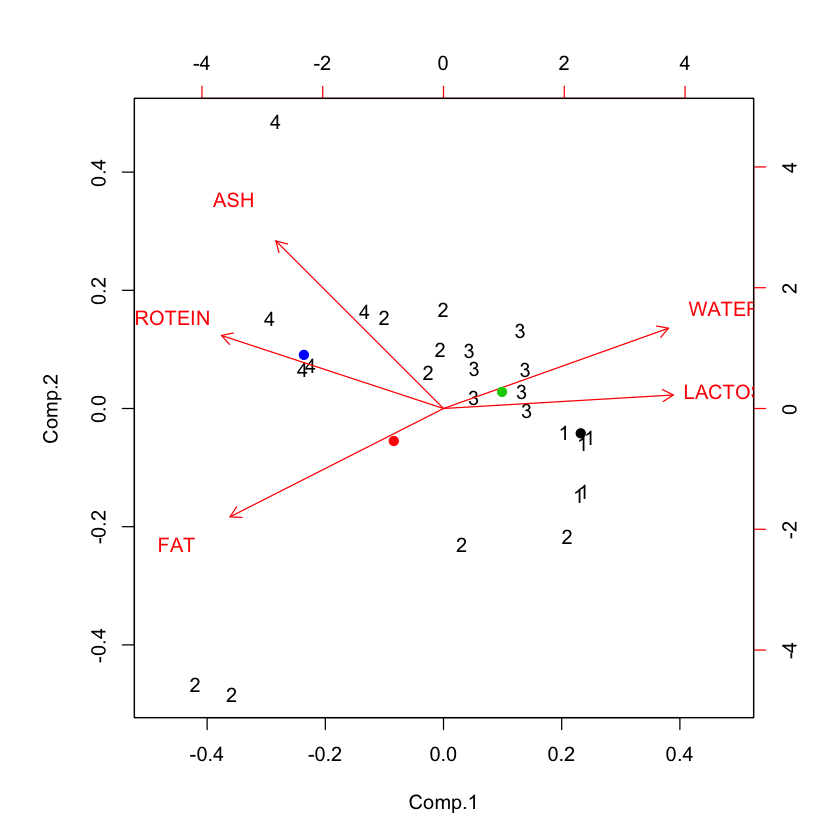

In [4]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,centers)

biplot(res,xlabs=cl)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:9,pch=19)


<b>Ejercicio 2: Repita el procedimiento considerando 2, 3 y 4 grupos. Discuta y compare  sus resultados con aquellos obtenidos con k-means<b>

Respuesta

2 grupos:<br>
Como se observa abajo para 2 grupos los agrupamientos son casi iguales para ambos modelos. El agrupamiento no parece ser muy efectivo, ya que ambos grupos poseen elementos muy distantes unos de otros.

<img src="2grupos.png">

3 grupos:<br>
- Con 3 grupos el modelo GMM no se desempeña bien. Podemos observar cómo el grupo número 2 de datos está casi mezclado con el 1 y cómo casi la mitad de sus elementos se encuentran en otro sector del gráfico.
- K-means pareciera tener un mejor agrupamiento para este conjunto de datos, separando los grupos de forma más clara, dividiendolos por el tipo de compuesto que posee cada grupo y la cantidad de este mismo.

<img src="3grupos.png">

4 grupos:
<br>
- Otra vez podemos observar que para este conjunto de datos el GMM no realiza una división de grupos muy efectiva. El GMM a separado el grupo 2 y 3, pero estos son muy similares, y los grupos 2 y 4 tienen algunos de sus elementos completamente alejados de sus agrupamientos principales.
- K-means ha logrado con esta cantidad de grupos separar el grupo 1 de los demás, formado así 4 grupos que parecieran estar divididos de una forma eficiente.

<img src="4grupos.png">

OBTENIENDO MODELO Y NUMERO DE GRUPOS con minima función de PERDIDA.

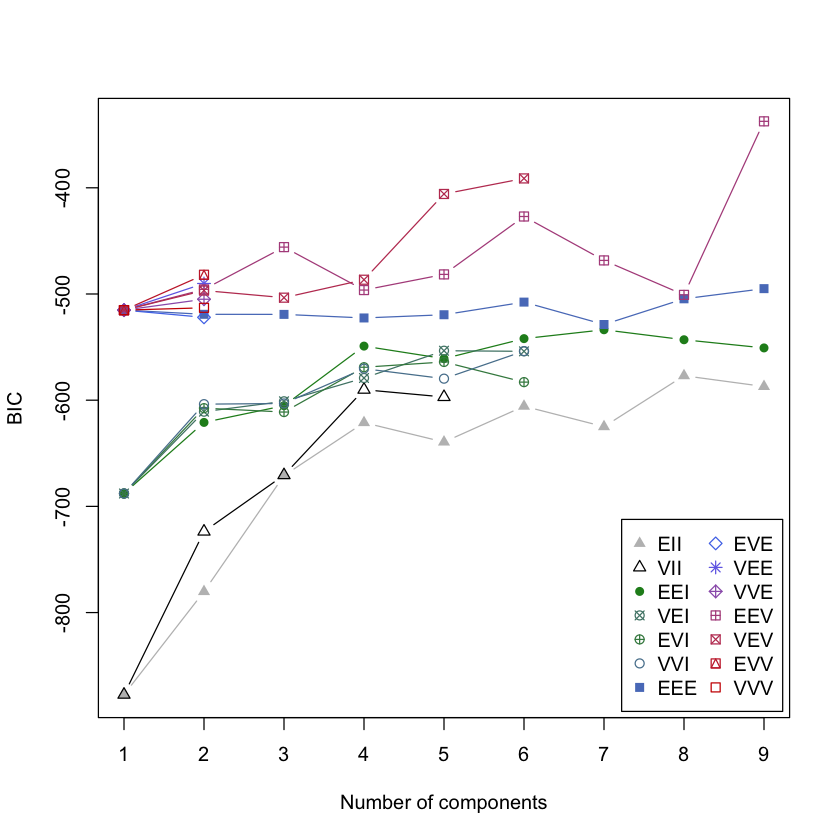

In [5]:
BIC <- mclustBIC(datos)
plot(BIC)

Número de grupos con minima funcion de perdida dado los datos.

PARA G=2 Y MODELO EEV

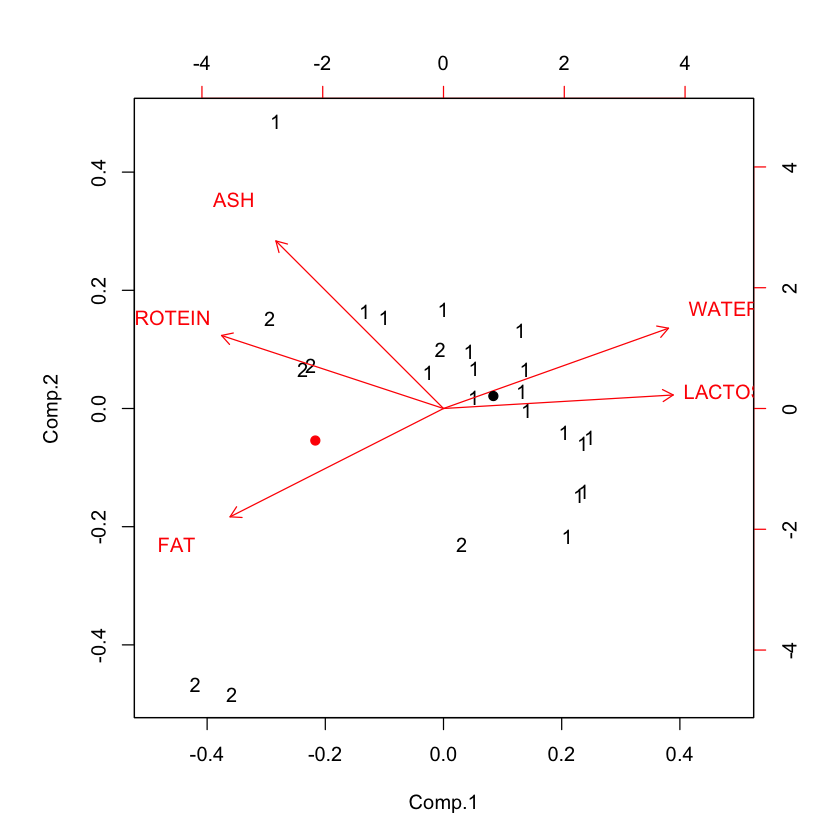

In [6]:
clus <-Mclust(datos, G=2, modelNames = "EEV")
cl <- clus$classification
centers <- t(clus$parameters$mean)
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,centers)
biplot(res,xlabs=cl)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:9,pch=19)

PARA G=3 Y MODELO EEV

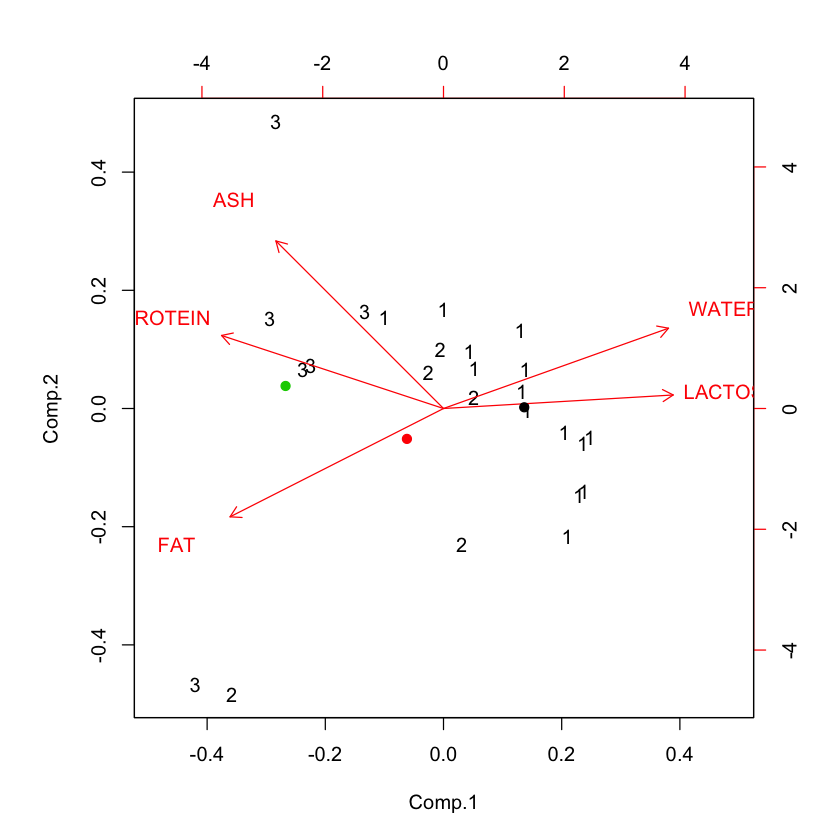

In [7]:
clus <-Mclust(datos, G=3, modelNames = "EEV")
cl <- clus$classification
centers <- t(clus$parameters$mean)
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,centers)
biplot(res,xlabs=cl)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:9,pch=19)

PARA G=4 Y MODELO EEV

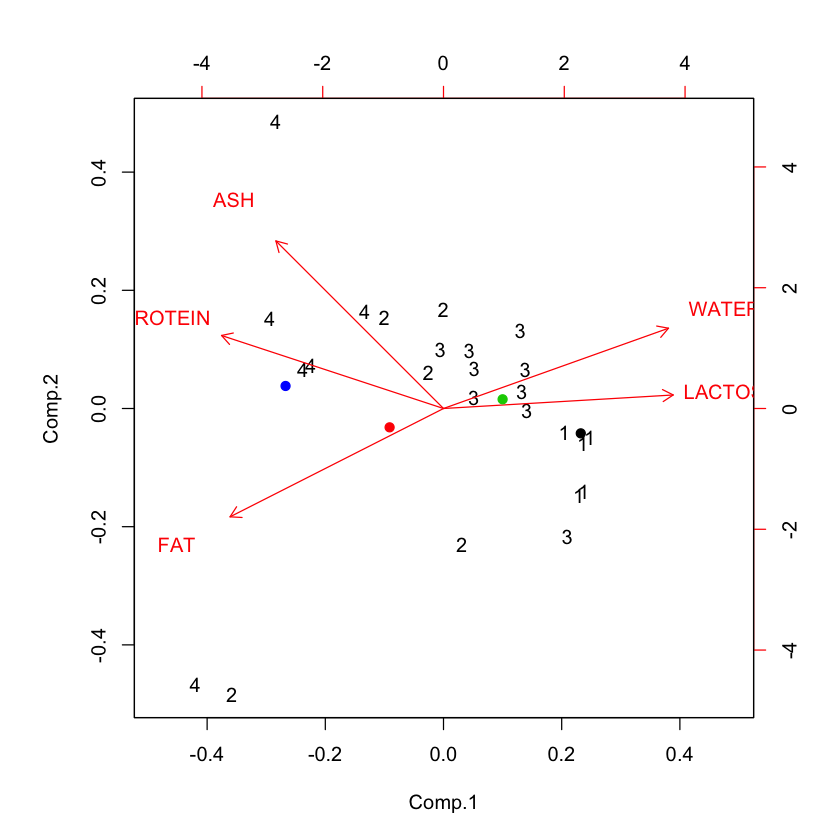

In [8]:
clus <-Mclust(datos, G=4, modelNames = "EEV")
cl <- clus$classification
centers <- t(clus$parameters$mean)
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,centers)
biplot(res,xlabs=cl)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:9,pch=19)

<h3><b>En lo que sigue, utilizaremos el método hclust, que permite realizar análisis de agrupamiento jerárquico.</b></h3>

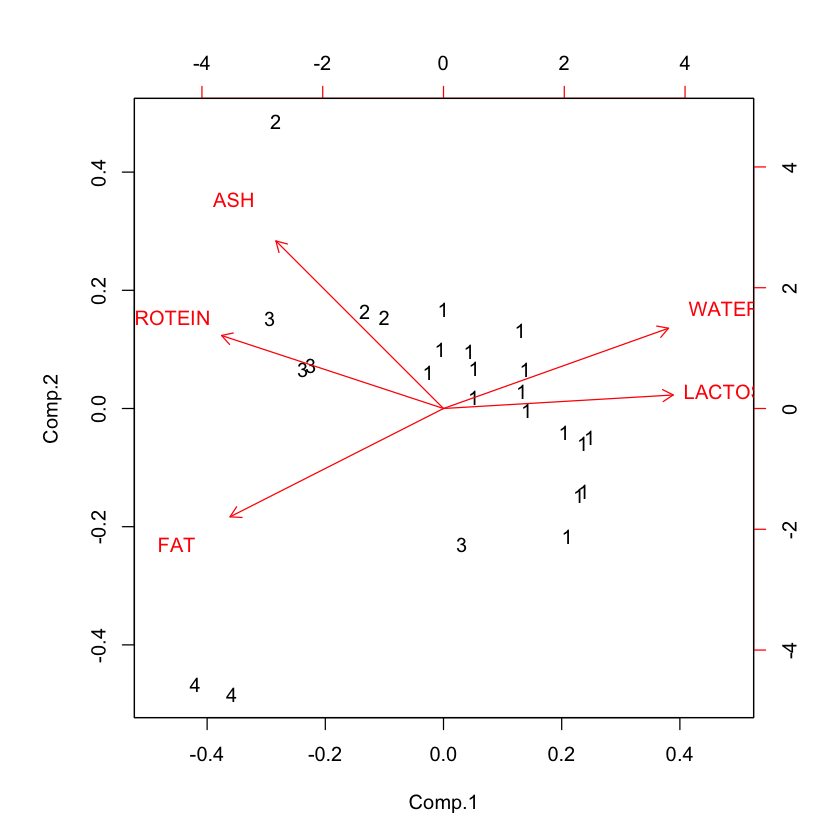

In [9]:
res3 <- hclust(dist(datos))
biplot(res, xlabs= cutree(res3,4))

<h3><b>Ejercicio 3: <br>
a) Explique como funciona el método hclust, describa parámetros de entrada y salida.<br>
b) Interprete y comente los resultados obtenidos. <br>
c) Utilice otros parámetros en hclust y discuta como varían los resultados. <br> </h3>

<b>a) Explique como funciona el método hclust, describa parámetros de entrada y salida.</b>

El método hckust realiza un análisis de agrupamiento jerárquico sobre un conjunto de disimilitudes.

<b>hclust(d, method = "complete", members = NULL)</b>

d: Estructura de disimilitud producida por el método "dist".<br><br>
método: El método de aglomeración a utilizar. Debe ser (una abreviatura inequívoca de) una de "ward.D", "ward.D2", "single", "complete", "average" (= UPGMA), "mcquitty" (= WPGMA), "median" (= WPGMC) o "centroide" (= UPGMC).<br><br>
miembros: NULL o un vector con longitud de d.

Esta función realiza un análisis de clúster jerárquico utilizando un conjunto de disimilitudes para los n objetos agrupados. Inicialmente, cada objeto se asigna a su propio clúster y luego el algoritmo avanza de forma iterativa, en cada etapa uniendo los dos clústeres más similares, continuando hasta que haya un solo clúster. En cada etapa, las distancias entre los grupos se vuelven a calcular con la fórmula de actualización de disimilitud de Lance-Williams de acuerdo con el método de agrupamiento particular que se está utilizando.

Una serie de diferentes métodos de agrupación se proporcionan:
- El método de variación mínima de Ward tiene como objetivo encontrar agrupaciones esféricas y compactas.
- El método de enlace completo encuentra grupos similares.
- El método de enlace único (que está estrechamente relacionado con el árbol de expansión mínima) adopta una estrategia de agrupación de "amigos de amigos". 

<b>b) Interprete y comente los resultados obtenidos. </b>

El agrupamiento realizado por este método es similar al hecho por KMeans, con k=4. Se ve bastante efectivo pues ha logrado separar los elementos del grupo 4 de los demás. Adicionalmente los demás grupos tienen a sus elementos claramente separados unos de otros.

<b>c) Utilice otros parámetros en hclust y discuta como varían los resultados. <b>

Agrupamiento Jerácquico - Enlace Simple - 3 Grupos

- Se ha elejido 3 grupos ya que al parecer, después de probar con diferentes cantidades de grupos, es la cantidad de grupos que separa los datos de mejor manera para este método.
- Se observa una clara separación entre los 3 grupos de datos, con algunos elementos del grupo 1 que están lejos del centro de masa de ese grupo. Podría deberse a algunos casos excepcionales.

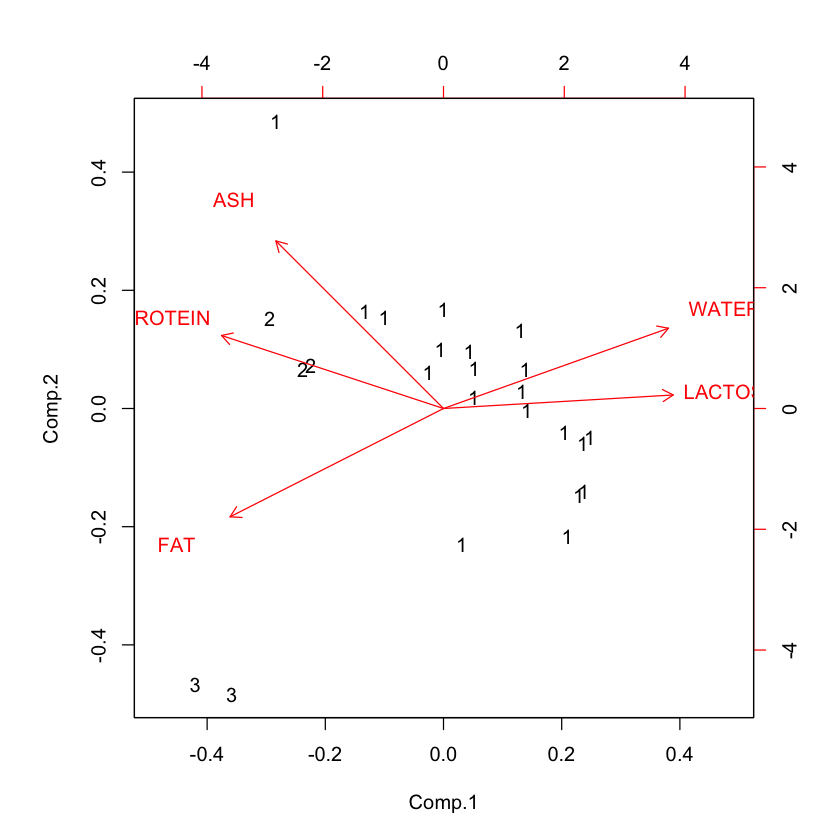

In [28]:
res3 <- hclust(dist(datos), method = "single")
biplot(res, xlabs= cutree(res3,3))

Agrupamiento Jerácquico - Enlace Promedio - 6 Grupos

- Se ha elejido 6 grupos ya que al parecer, después de probar con diferentes cantidades de grupos, es la cantidad de grupos que separa los datos de mejor manera para este método.
- Si bien la separación entre los grupos no es tan clara la mayoria de los elementos lejanos se agruparon para formar nuevos grupos, este es el caso del grupo 4 y 6.
- Si bien uno de los elementos del grupo 3 sigue estando lejos de los otros elementos de ese grupo, este podría ser un caso excepcional. 

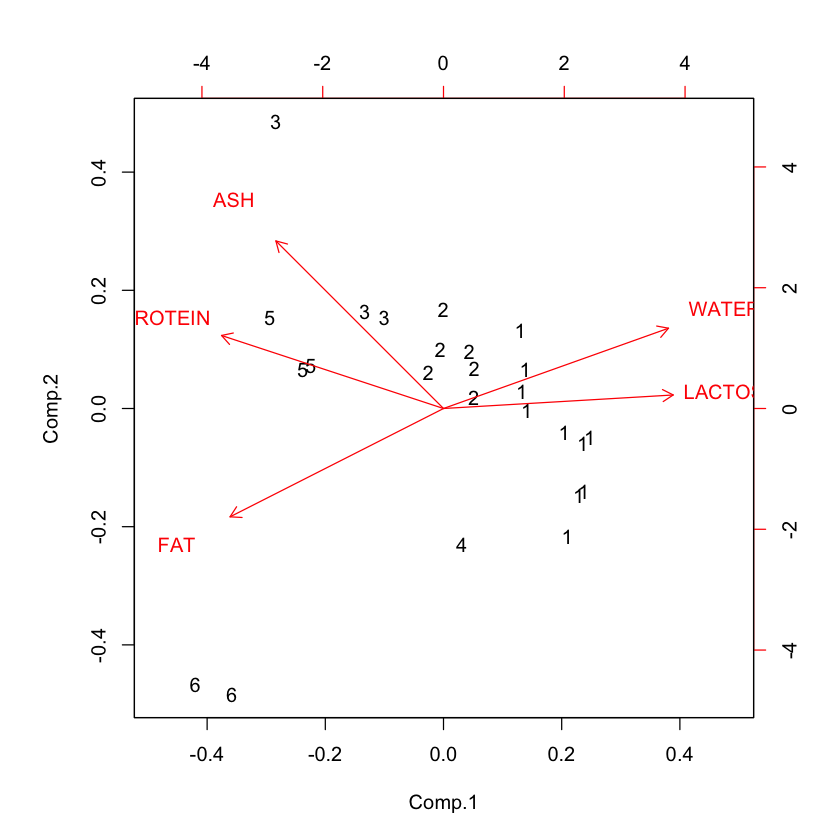

In [14]:
res3 <- hclust(dist(datos), method = "average")
biplot(res, xlabs= cutree(res3,6))

Agrupamiento Jerácquico - Enlace Completo - 6 Grupos

- Se ha elejido 6 grupos ya que al parecer, después de probar con diferentes cantidades de grupos, es la cantidad de grupos que separa los datos de mejor manera para este método.
- Al igual con con el método de enlace promedio se logró agrupar la mayoría de elementos lejanos en nuevos grupos, este es el caso del grupo 4 y 6.
- Si bien uno de los elementos del grupo 3 sigue estando lejos de los otros elementos de ese grupo, este podría ser un caso excepcional. 

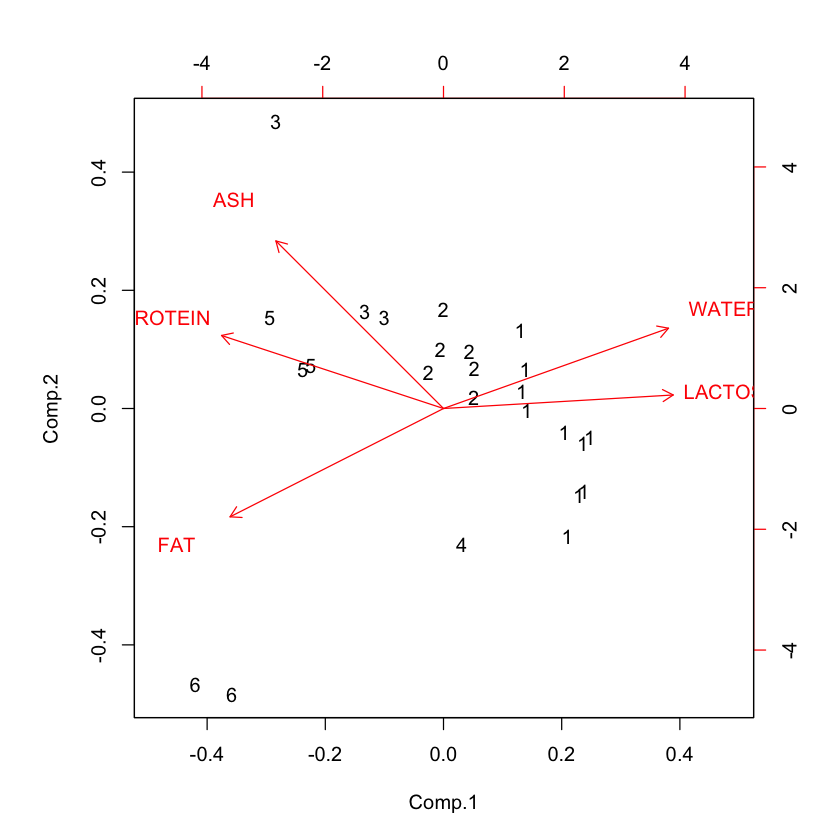

In [20]:
res3 <- hclust(dist(datos), method = "complete")
biplot(res, xlabs= cutree(res3,6))

Ejercicio 4: 
a) Realice un análisis de clustering con Kmeans, GMM y Análisis Jerárquico para el conjunto de datos iris.csv
Interprete sus resultados.
b) Calcule alguna de las medidas de calidad estudiadas (purity, rand index o mutual information) 
para cada uno de los análisis realizado en (a). Discuta sus resultados.

     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  